# Introduction

This report examines the relationship between an individual Major League Baseball player’s Wins Above Replacement (WAR) and their team's winning percentage, season outcome, and Win Probability Added (WPA). The null hypothesis of this report posits that a player’s WAR has little impact on their team’s winning percentage (μ1), meaning players with high or low WAR have an equivalent impact (μ2).

$H_0: μ_1 = μ_2$ or $μ_1 - μ_2 = 0$

The alternative hypothesis suggests that a player’s WAR positively or negatively influences their team’s winning chances:

$H_A: μ_1 ≠ μ_2$ or $μ_1 - μ_2 ≠ 0$

This research addresses the widespread use of WAR among baseball fans, many of whom are unfamiliar with the underlying calculations or its correlation with team success. By combining a mathematical explanation of WAR with statistical analysis of its relationship to team performance and WPA, this report aims to clarify whether WAR is a meaningful indicator of team success or merely an individualistic stat. This investigation will enhance my understanding and appreciation of this frequently used baseball metric.

### Explanation of WAR and WPA

Wins Above Replacement (WAR) and Win Probability Added (WPA) are metrics developed during the sabermetric revolution in baseball, popularised by Bill James. Sabermetrics sought to refine player evaluation by introducing new metrics that better capture a player's value (Society for American Baseball Research, n.d.).


It should also be noted that although the number of wins required to reach the post-season changes each season, the mean number of wins of a post-season team since 1994 is 93 to 94 (Manning, 2018). This equates to a winning percentage of 0.574 to 0.580, which can be used as a guide for which teams should have made the post-season, if they played in an “average” season. 



# _impoting pandas_

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import openpyxl
import xlrd
from datetime import datetime


In [2]:

%matplotlib inline

# WAR Data Set Analysis

Loading Up the csv File

In [112]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup

def load_data(filepath, url):
    if os.path.isfile(filepath):
        print("Loading from file")
        try:
            return pd.read_csv(filepath, encoding='ISO-8859-1')  # Adjust the encoding as needed
        except Exception as e:
            print(f"Failed to load from file: {e}")
            print("Attempting to load from the internet instead...")

    print("Loading from the internet")
    response = requests.get(url)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", {"id": "players_value_batting"})
    if table is None:
        raise ValueError("Table with id 'players_value_batting' not found")

    data = pd.read_html(str(table))[0]
    data.to_csv(filepath, index=False)
    return data

filepath = "WAR_2023.csv"
url = "https://www.baseball-reference.com/leagues/majors/2023-value-batting.shtml"

try:
    WAR_2023 = load_data(filepath, url)
    print("Data loading complete")
except Exception as e:
    print(f"Data loading failed: {e}")


Loading from file
Data loading complete


# Glossary # 

Rrep -- Runs from Replacement Level

RAR -- Runs Above Replacement Level

WAR -- Wins Above Replacement

waaWL% -- Win-Loss% w/ Avg. Team

162WL% -- Win-Loss% w/ Avg. Team Season

oWAR -- Offensive Wins Above Replacement (everything but Fielding)

dWAR -- Defensive Wins Above Replacement for Position Players

oRAR -- Offensive Runs Above Replacement Level

Salary

G -- Games Played or Pitched

PA -- Plate Appearances

Rbat -- Runs Batting

Rbaser -- Runs from Baserunning

Rdp -- Runs Grounded into Double Plays

Rfield -- Runs from Fielding

Rpos -- Runs from Positional Scarcity

RAA -- Runs Better than Avg

WAA -- Wins Above Avg
"""


In [123]:
import pandas as pd
import numpy as np

# Read the CSV file with a specific encoding
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='ISO-8859-1')

# Create a subset of your data for demonstration
# We'll use the first 10 rows to keep it manageable
df2 = data.head(10)

# Simple display without any color or extra styling
styled_df = df2.style.set_caption("Simple Table of WAR_2023 Dataset")

# Display the styled DataFrame
styled_df



,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Name-additional
0,1,CJ Abrams*,22,WSN,151,614,-5,4,3,4,9,14,1.400000,21,35,3.400000,0.509000,0.509000,3.000000,1.300000,31,"$724,200",Traded,*6/H,abramcj01
1,2,José Abreu,36,HOU,141,594,-8,-2,-1,-1,-7,-19,-1.900000,20,1,0.000000,0.486000,0.488000,0.100000,-0.800000,2,"$19,500,000",Free Agency,*3/D,abreujo02
2,3,Wilyer Abreu*,24,BOS,28,85,3,0,0,2,0,5,0.500000,3,8,0.800000,0.517000,0.503000,0.600000,0.200000,6,nan,Traded,87/H9D,abreuwi02
3,4,Ronald Acuña Jr.,25,ATL,159,735,63,7,-1,-2,-5,63,6.100000,23,86,8.200000,0.538000,0.538000,8.500000,-0.700000,88,"$17,000,000",Amateur Free Agent,*9/D,acunaro01
4,5,Willy Adames,27,MIL,149,638,-5,-3,0,8,9,10,1.000000,21,31,3.000000,0.507000,0.506000,2.200000,1.700000,23,"$8,700,000",Traded,*6/D,adamewi01
5,6,Jordyn Adams,23,LAA,17,40,-6,-1,0,-1,0,-8,-0.900000,1,-7,-0.700000,0.450000,0.495000,-0.600000,-0.100000,-6,nan,Amateur Draft,/98H7,adamsjo03
6,7,Riley Adams,27,WSN,44,158,3,-1,-1,1,3,5,0.500000,5,11,1.000000,0.512000,0.503000,1.000000,0.400000,10,"$728,800",Traded,2/HD,adamsri03
7,8,Ty Adcock,26,SEA,1,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0.500000,0.500000,0.000000,0.000000,0,nan,Amateur Draft,1,adcocty01
8,9,Jo Adell,24,LAA,17,62,-2,0,0,3,0,1,0.100000,2,3,0.300000,0.507000,0.501000,0.000000,0.300000,0,nan,Amateur Draft,/987DH,adelljo01
9,10,Ehire Adrianza#,33,ATL,5,11,-2,0,0,-1,0,-3,-0.300000,0,-3,-0.300000,0.432000,0.498000,-0.200000,-0.100000,-2,"$1,000,000",Traded,/H6,adriaeh01


### Explanation of WAR

WAR attempts to quantify a player's overall value, including contributions from batting, fielding, and base-running. FanGraphs defines WAR as:

$$
\text{WAR} = \frac{\text{Batting Runs} + \text{Base Running Runs} + \text{Fielding Runs} + \text{Positional Adjustment} + \text{League Adjustment} + \text{Replacement Runs}}{\text{Runs Per Win}}
$$

In simple terms, WAR calculates the value a player adds to a team, with adjustments for their position and league context. For instance, a good hitter in a tough position, like catcher, is more valuable than a designated hitter with similar stats. Replacement runs measure the difference between a replacement-level player and an average player:

$$
\text{Replacement Runs} = 570 \left(\frac{\text{MLB Games}}{2430}\right) \left(\frac{\text{Runs Per Win}}{\text{League Plate Appearances}}\right) \times \text{Plate Appearances}
$$

Where the numeral 570 represents 57% of the 1000 WAR allocated to position players, and MLB games are how many games have been played in the MLB season at a specific point. 

Runs Per Win includes a second formula, which calculates the runs necessary to win an MLB game (usually between 9 and 10). RPW = 

$$
9 \left(\frac{\text{MLB Runs Scored}}{\text{MLB Innings Pitched}}\right) \times 1.5 + 3
$$

While there are many details within the WAR formula, this overview provides the key concepts behind its calculation (Slowinski, 2012).

The below graph represents the distribution of WAR in the 2023 season, with a WAR of 0 being the most common as it included players with Nil to low game time throughout the 2023 season, having little impact on their teams outcomes.

In [124]:
import pandas as pd
import plotly.express as px

# Load the CSV data with the correct encoding
file_path = "WAR_2023.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Adjust encoding if necessary

# Extract the WAR column (assuming it's the 16th column, index 15)
war_column = df.iloc[:, 15]

# Compute the frequency distribution of the WAR values
war_counts = war_column.value_counts().sort_index()

# Create an interactive line plot using Plotly
fig = px.line(
    x=war_counts.index,
    y=war_counts.values,
    title="Distribution of WAR in the 2023 Season",
    labels={'x': 'WAR', 'y': 'Frequency of Players'},
    template='plotly_dark',  # Use a dark theme for visual appeal
)

# Customize the plot further
fig.update_layout(
    xaxis_title="WAR",
    yaxis_title="Frequency of Players",
    title_x=0.5,  # Center the title
    showlegend=False,
    hovermode='x unified',  # Show hover information along the x-axis
)

# Add interactivity features
fig.update_traces(
    hovertemplate='WAR: %{x}<br>Frequency of Players: %{y}<extra></extra>',  # Custom tooltip
    line=dict(color='rgba(255, 65, 54, 0.7)', width=3),  # Customize line color and width
)

# Show the plot
fig.show()

### Creating a list of the top 50 players based off of their WAR

### Creating a List of the bottom 50 Players based off of their WAR.

In [141]:
import pandas as pd

def get_top_50_numbers(data):
    try:
        # Extract column names for column 2, column 16, and column 18
        column_2_name = data.columns[1]  # Column 2 (index 1)
        column_16_name = data.columns[15]  # Column 16 (index 15)
        column_18_name = data.columns[17]  # Column 18 (index 17)
        
        # Extract column 2, column 16, and column 18
        column_2 = data.iloc[:, 1]
        column_16 = data.iloc[:, 15]
        column_18 = data.iloc[:, 17]
        
        # Convert column 18 values to percentages
        column_18_percentage = column_18 * 100
        
        # Combine the three columns into a new DataFrame with their original titles
        combined_data = pd.DataFrame({
            column_2_name: column_2,
            column_16_name: column_16,
            f"{column_18_name} (%)": column_18_percentage  # Renaming to indicate percentage
        })
        
        # Sort the data based on column 16 in descending order
        sorted_data = combined_data.sort_values(by=column_16_name, ascending=False)
        
        # Retrieve the top 50 rows based on column 16
        top_50 = sorted_data.head(50).reset_index(drop=True)
        
        # Display the top 50 in a styled table
        styled_top_50 = top_50.style.set_caption("Top 50 Entries from WAR_2023 Dataset")
        return styled_top_50
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming `data` is already a DataFrame loaded with the necessary data
data = pd.read_csv("WAR_2023.csv", encoding='latin1')

# Get the top 50 numbers from column 16 and their corresponding values in columns 2 and 18 with original titles
get_top_50_numbers(data)


,Name,WAR,162WL% (%)
0,Mookie Betts,8.300000,53.900000
1,Ronald Acuña Jr.,8.200000,53.800000
2,Marcus Semien,7.400000,53.100000
3,Matt Olson*,7.400000,53.200000
4,Corey Seager*,6.900000,53.200000
5,Freddie Freeman*,6.500000,52.700000
6,Gunnar Henderson*,6.200000,52.500000
7,Shohei Ohtani*,6.000000,52.800000
8,Francisco Lindor#,6.000000,52.400000
9,Austin Riley,5.900000,52.300000


In [142]:
import pandas as pd

def get_bottom_50_numbers(data):
    try:
        # Extract column names for column 2, column 16, and column 18
        column_2_name = data.columns[1]  # Column 2 (index 1)
        column_16_name = data.columns[15]  # Column 16 (index 15)
        column_18_name = data.columns[17]  # Column 18 (index 17)
        
        # Extract column 2, column 16, and column 18
        column_2 = data.iloc[:, 1]
        column_16 = data.iloc[:, 15]
        column_18 = data.iloc[:, 17]
        
        # Convert column 18 values to percentages
        column_18_percentage = column_18 * 100
        
        # Combine the three columns into a new DataFrame with their original titles
        combined_data = pd.DataFrame({
            column_2_name: column_2,
            column_16_name: column_16,
            f"{column_18_name} (%)": column_18_percentage  # Renaming to indicate percentage
        })
        
        # Sort the data based on column 16 in ascending order
        sorted_data = combined_data.sort_values(by=column_16_name, ascending=True)
        
        # Retrieve the bottom 50 rows based on column 16
        bottom_50 = sorted_data.head(50).reset_index(drop=True)
        
        # Display the bottom 50 in a styled table
        styled_bottom_50 = bottom_50.style.set_caption("Bottom 50 Entries from WAR_2023 Dataset")
        return styled_bottom_50
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming `data` is already a DataFrame loaded with the necessary data
data = pd.read_csv("WAR_2023.csv", encoding='latin1')

# Get the bottom 50 numbers from column 16 and their corresponding values in columns 2 and 18 with original titles
get_bottom_50_numbers(data)


,Name,WAR,162WL% (%)
0,Tim Anderson,-2.000000,47.700000
1,Jean Segura,-1.900000,48.200000
2,Oscar Colás*,-1.500000,48.500000
3,Gavin Sheets*,-1.500000,48.300000
4,Michael Toglia#,-1.500000,48.800000
5,Nick Maton*,-1.500000,48.500000
6,Oswaldo Cabrera#,-1.500000,48.400000
7,Trey Mancini,-1.400000,48.600000
8,Oscar González,-1.400000,48.800000
9,Harold Castro*,-1.400000,48.600000


### By collecting the Mean, Meadian, Variance and standard deviation, it allows to determine whether there is a corralation between my datasets. ###

In [132]:
import pandas as pd

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract column 16 (WAR values)
column_16_name = data.columns[15]  # Adjust the index if needed

# Sort the data based on column 16 in descending order
sorted_data = data.sort_values(by=column_16_name, ascending=False)

# Retrieve the top 50 and bottom 50 rows based on column 16
top_50 = sorted_data.head(50).reset_index(drop=True)
bottom_50 = sorted_data.tail(50).reset_index(drop=True)

# Calculate statistics for the top 50
top_50_stats = {
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    'Top 50': [
        top_50[column_16_name].mean(),
        top_50[column_16_name].median(),
        top_50[column_16_name].var(),
        top_50[column_16_name].std()
    ]
}

# Calculate statistics for the bottom 50
bottom_50_stats = {
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    'Bottom 50': [
        bottom_50[column_16_name].mean(),
        bottom_50[column_16_name].median(),
        bottom_50[column_16_name].var(),
        bottom_50[column_16_name].std()
    ]
}

# Create DataFrames for top and bottom statistics
top_50_df = pd.DataFrame(top_50_stats).set_index('Statistic')
bottom_50_df = pd.DataFrame(bottom_50_stats).set_index('Statistic')

# Display the tables side by side using pandas styling
top_50_styled = top_50_df.style.set_caption("Top 50 WAR/162 Games").set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
    {'selector': 'th', 'props': 'font-weight: bold;'},
])

bottom_50_styled = bottom_50_df.style.set_caption("Lowest 50 WAR/162 Games").set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
    {'selector': 'th', 'props': 'font-weight: bold;'},
])

# Display in Jupyter Notebook
display(top_50_styled)
display(bottom_50_styled)



,Top 50
Statistic,
Mean,5.090000
Median,4.900000
Variance,1.235612
Standard Deviation,1.111581


,Bottom 50
Statistic,
Mean,-1.066667
Median,-1.000000
Variance,0.112273
Standard Deviation,0.335071


### By Creating a box plot i am able to compair the avarges of the to 50 WAR and Bottom 50 WAR

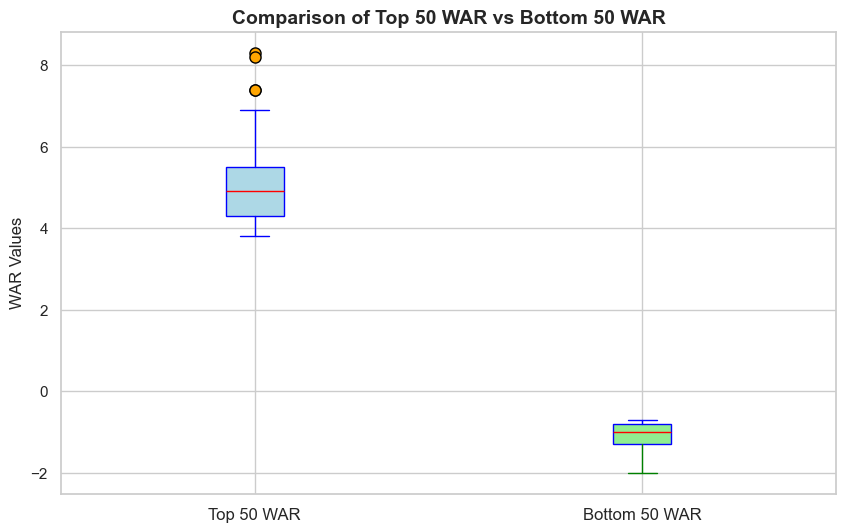

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract column 16 (WAR values)
column_16_name = data.columns[15]  # Adjust the index if needed

# Sort the data based on column 16 in descending order
sorted_data = data.sort_values(by=column_16_name, ascending=False)

# Retrieve the top 50 and bottom 50 rows based on column 16
top_50 = sorted_data.head(50).reset_index(drop=True)
bottom_50 = sorted_data.tail(50).reset_index(drop=True)

# Extract the WAR values for top 50 and bottom 50
top_50_war = top_50[column_16_name]
bottom_50_war = bottom_50[column_16_name]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Top 50 WAR': top_50_war,
    'Bottom 50 WAR': bottom_50_war
})

# Plotting the box plot
plt.figure(figsize=(10, 6))

# Pandas' built-in box plot with different colors for each box
boxplot = plot_data.boxplot(patch_artist=True,
                            boxprops=dict(facecolor='lightblue', color='blue'),  # Color of the top 50 box
                            medianprops=dict(color='red'),                      # Color of the median line
                            whiskerprops=dict(color='blue'),                    # Color of the whiskers
                            capprops=dict(color='blue'),                        # Color of the caps
                            flierprops=dict(markerfacecolor='orange', marker='o', markersize=8, linestyle='none'),  # Outliers
                            return_type='dict')

# Coloring the bottom 50 WAR differently
for whisker, cap, box, median, flier in zip(boxplot['whiskers'][2:], boxplot['caps'][2:], boxplot['boxes'][1:], boxplot['medians'][1:], boxplot['fliers'][1:]):
    whisker.set_color('green')
    cap.set_color('green')
    box.set(facecolor='lightgreen')
    median.set_color('red')
    flier.set(markerfacecolor='orange', marker='o', markersize=8, linestyle='none')

# Set plot title and labels
plt.title("Comparison of Top 50 WAR vs Bottom 50 WAR", fontsize=14, fontweight='bold')
plt.ylabel("WAR Values")
plt.xticks([1, 2], ['Top 50 WAR', 'Bottom 50 WAR'], fontsize=12)

plt.show()


In [146]:
import pandas as pd

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract the column name for column 18 (which we will convert to percentages)
column_18_name = data.columns[17]  # Adjust the index if needed

# Sort the data based on WAR (column 16) in descending order
column_16_name = data.columns[15]
sorted_data = data.sort_values(by=column_16_name, ascending=False)

# Retrieve the top 50 and bottom 50 rows based on column 16
top_50 = sorted_data.head(50).reset_index(drop=True)
bottom_50 = sorted_data.tail(50).reset_index(drop=True)

# Convert column 18 values to percentages and round to two decimal places
top_50[f"{column_18_name} (%)"] = (top_50[column_18_name] * 100).round(2)
bottom_50[f"{column_18_name} (%)"] = (bottom_50[column_18_name] * 100).round(2)

# Calculate statistics for the top 50 percentage values
top_50_stats = {
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    f"Top 50 {column_18_name} (%)": [
        top_50[f"{column_18_name} (%)"].mean(),
        top_50[f"{column_18_name} (%)"].median(),
        top_50[f"{column_18_name} (%)"].var(),
        top_50[f"{column_18_name} (%)"].std()
    ]
}

# Calculate statistics for the bottom 50 percentage values
bottom_50_stats = {
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    f"Bottom 50 {column_18_name} (%)": [
        bottom_50[f"{column_18_name} (%)"].mean(),
        bottom_50[f"{column_18_name} (%)"].median(),
        bottom_50[f"{column_18_name} (%)"].var(),
        bottom_50[f"{column_18_name} (%)"].std()
    ]
}

# Create DataFrames for top and bottom statistics
top_50_df = pd.DataFrame(top_50_stats).set_index('Statistic')
bottom_50_df = pd.DataFrame(bottom_50_stats).set_index('Statistic')

# Display the top 50 statistics table
top_50_styled = top_50_df.style.set_caption(f"Top 50 {column_18_name} Statistics (as Percentage)").set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
    {'selector': 'th', 'props': 'font-weight: bold;'},
])

# Display the bottom 50 statistics table
bottom_50_styled = bottom_50_df.style.set_caption(f"Bottom 50 {column_18_name} Statistics (as Percentage)").set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
    {'selector': 'th', 'props': 'font-weight: bold;'},
])

# Display in Jupyter Notebook
display(top_50_styled)
display(bottom_50_styled)


,Top 50 162WL% (%)
Statistic,
Mean,51.946000
Median,51.850000
Variance,0.422535
Standard Deviation,0.650027


,Bottom 50 162WL% (%)
Statistic,
Mean,48.910870
Median,48.900000
Variance,0.190324
Standard Deviation,0.436261


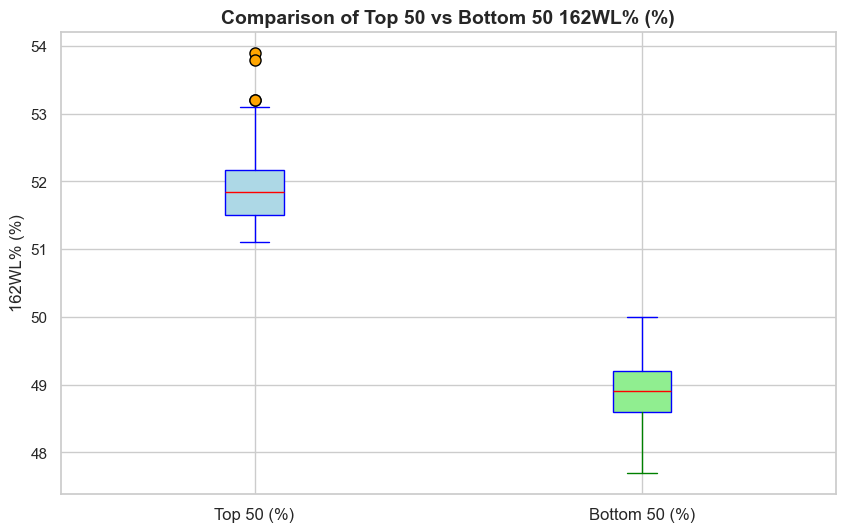

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract column 16 (WAR values) and column 18 (which we will convert to percentages)
column_18_name = data.columns[17]  # Adjust the index if needed

# Sort the data based on WAR (column 16) in descending order
column_16_name = data.columns[15]
sorted_data = data.sort_values(by=column_16_name, ascending=False)

# Retrieve the top 50 and bottom 50 rows based on column 16
top_50 = sorted_data.head(50).reset_index(drop=True)
bottom_50 = sorted_data.tail(50).reset_index(drop=True)

# Convert column 18 values to percentages
top_50_percentage = (top_50[column_18_name] * 100).round(2)
bottom_50_percentage = (bottom_50[column_18_name] * 100).round(2)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Top 50 (%)': top_50_percentage,
    'Bottom 50 (%)': bottom_50_percentage
})

# Plotting the box plot
plt.figure(figsize=(10, 6))

# Pandas' built-in box plot with different colors for each box
boxplot = plot_data.boxplot(patch_artist=True,
                            boxprops=dict(facecolor='lightblue', color='blue'),  # Color of the top 50 box
                            medianprops=dict(color='red'),                      # Color of the median line
                            whiskerprops=dict(color='blue'),                    # Color of the whiskers
                            capprops=dict(color='blue'),                        # Color of the caps
                            flierprops=dict(markerfacecolor='orange', marker='o', markersize=8, linestyle='none'),  # Outliers
                            return_type='dict')

# Coloring the bottom 50 (%) differently
for whisker, cap, box, median, flier in zip(boxplot['whiskers'][2:], boxplot['caps'][2:], boxplot['boxes'][1:], boxplot['medians'][1:], boxplot['fliers'][1:]):
    whisker.set_color('green')
    cap.set_color('green')
    box.set(facecolor='lightgreen')
    median.set_color('red')
    flier.set(markerfacecolor='orange', marker='o', markersize=8, linestyle='none')

# Set plot title and labels
plt.title(f"Comparison of Top 50 vs Bottom 50 {column_18_name} (%)", fontsize=14, fontweight='bold')
plt.ylabel(f"{column_18_name} (%)")
plt.xticks([1, 2], ['Top 50 (%)', 'Bottom 50 (%)'], fontsize=12)

plt.show()


collecting the top 50 war vales team wining percentages

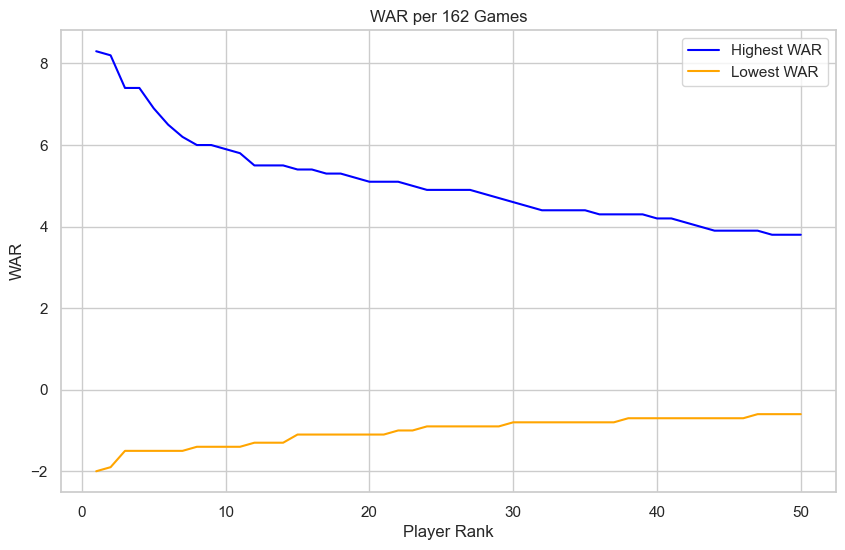

In [151]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_16.nlargest(50)

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Create an index for x-axis
    index = range(1, 51)

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(index, top_50_values.values, label='Highest WAR', color='blue')
    plt.plot(index, bottom_50_values.values, label='Lowest WAR', color='orange')
    plt.title('WAR per 162 Games')
    plt.xlabel('Player Rank')
    plt.ylabel('WAR')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the data: {e}")


# WPA

In [94]:

file_path = "WPA_2023.csv"

if os.path.isfile(file_path):
    print("loading from file")
    try:
        WPA_2023 = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        WPA_2023 = pd.read_csv(file_path, encoding='ISO-8859-1')
else:
    print("loading from the internet")
    url = "https://www.baseball-reference.com/leagues/majors/2023-win_probability-batting.shtml"
    response = requests.get(url)
    
    if response.status_code == 200:
        tables = pd.read_html(response.text)
        
        # Assuming the first table on the page is the one we want
        WPA_2023 = tables[0]
        
        # Save the table as a CSV file for future use
        WPA_2023.to_csv(file_path, index=False, encoding='utf-8')
    else:
        print("Failed to retrieve data from the internet.")
        WPA_2023 = pd.DataFrame()  # Return an empty DataFrame in case of failure

print("done")


loading from file
done


### Explanation of WPA

WPA is simpler to calculate. It reflects a player’s contribution to their team’s win probability at any moment in a game. For example, if a player steps up to bat with a 20% chance of his team winning, and the result of his at-bat leads to a win, he earns 0.8 WPA. Conversely, the pitcher responsible for the loss receives -0.8 WPA. WPA over a season sums all events where a player influenced the win probability (Slowinski, 2010). For instance, Babe Ruth's 1929 WPA of 9.4 indicates he improved his team’s win probability by 940% that season (Baseball Reference, n.d.).



In [152]:
import pandas as pd
import os

# Define the file path for the WPA_2023 dataset
file_path = "WPA_2023.csv"

# Load the CSV file
if os.path.isfile(file_path):
    print("Loading from file")
    try:
        WPA_2023 = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        WPA_2023 = pd.read_csv(file_path, encoding='ISO-8859-1')
else:
    print("File not found")
    WPA_2023 = pd.DataFrame()  # Return an empty DataFrame in case of failure

# Create a subset of the data for demonstration
df2 = WPA_2023.head(10)

# Simple display without any color or extra styling
styled_df = df2.style.set_caption("Simple Table of WPA_2023 Dataset")

# Display the styled DataFrame
styled_df


Loading from file


,Rk,Name,Age,PA,Tm,BtRuns,BtWins,Plays,WPA,WPA+,WPA-,aLI,WPA/LI,Clutch,cWPA,cWPA+,cWPA-,acLI,cClutch,RE24,REW,boLI,RE24/boLI,PHlev,AB,Name-additional
0,1,CJ Abrams*,22,614,WSN,-5.000000,-0.500000,670,-1.000000,11.400000,-12.400000,1.080000,0.000000,-0.900000,-0.20%,1.70%,-1.90%,0.260000,-0.40%,-3.600000,-0.400000,0.970000,1.400000,2.190000,1,abramcj01
1,2,José Abreu,36,594,HOU,-10.300000,-1.000000,602,-1.200000,10.200000,-11.400000,1.030000,-1.100000,-0.100000,-0.60%,11.00%,-11.60%,1.750000,0.30%,-2.100000,-0.200000,1.000000,-11.700000,nan,0,abreujo02
2,3,Wilyer Abreu*,24,85,BOS,3.600000,0.400000,89,-0.100000,1.400000,-1.500000,1.060000,0.200000,-0.300000,-0.10%,0.20%,-0.20%,0.240000,-0.30%,4.800000,0.500000,0.950000,4.400000,1.800000,6,abreuwi02
3,4,Ronald Acuña Jr.,25,735,ATL,63.500000,6.000000,843,6.800000,17.000000,-10.200000,0.930000,6.200000,1.200000,2.50%,7.00%,-4.50%,0.660000,0.30%,73.500000,6.900000,0.950000,73.400000,nan,0,acunaro01
4,5,Willy Adames,27,638,MIL,-3.000000,-0.300000,651,-0.700000,10.700000,-11.400000,0.990000,-0.400000,-0.400000,-0.60%,6.40%,-7.00%,1.000000,-0.50%,-7.100000,-0.700000,0.930000,-5.600000,nan,0,adamewi01
5,6,Jordyn Adams,23,40,LAA,-7.100000,-0.700000,45,-0.500000,0.400000,-0.900000,1.010000,-0.500000,0.100000,0.00%,0.00%,0.00%,0.050000,-0.20%,-6.100000,-0.600000,0.850000,-6.600000,0.010000,2,adamsjo03
6,7,Riley Adams,27,158,WSN,4.200000,0.400000,159,0.100000,2.400000,-2.300000,0.840000,-0.100000,0.300000,0.00%,0.30%,-0.30%,0.160000,0.30%,2.100000,0.200000,0.930000,1.500000,1.480000,3,adamsri03
7,8,Jo Adell,24,62,LAA,-1.400000,-0.100000,63,0.100000,0.900000,-0.900000,0.750000,-0.200000,0.300000,0.00%,0.10%,-0.10%,0.190000,-0.10%,-0.100000,0.000000,0.870000,-2.400000,nan,1,adelljo01
8,9,Ehire Adrianza#,33,11,ATL,-2.500000,-0.300000,11,-0.200000,0.000000,-0.200000,0.940000,-0.200000,0.000000,-0.20%,0.00%,-0.20%,1.190000,0.00%,-2.200000,-0.200000,0.880000,-2.800000,1.140000,3,adriaeh01
9,10,Jesús Aguilar,33,115,OAK,-1.700000,-0.200000,115,-0.700000,1.600000,-2.300000,0.990000,-0.200000,-0.400000,0.00%,0.50%,-0.60%,0.420000,-0.10%,-7.300000,-0.700000,0.940000,-3.600000,1.410000,6,aguilje01


In [95]:
import pandas as pd
import plotly.graph_objects as go

# Define the data
ratings = ['Excellent', 'Great', 'Above Average', 'Average', 'Below Average', 'Poor', 'Awful']
wpa = [+6.0, +3.0, +2.0, +1.0, 0.0, -1.0, -3.0]

# Create a DataFrame
data = {'Rating': ratings, 'WPA': wpa}
df = pd.DataFrame(data)

# Create a table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Rating</b>', '<b>WPA</b>'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df['Rating'], df['WPA']],
               fill_color='lavender',
               align='left'))
])

# Update the layout
fig.update_layout(title='Rating vs WPA')

# Show the table
fig.show()


In [96]:
import pandas as pd
import plotly.express as px
import os

def get_top_50_unique_names(data):
    column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
    column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
    combined_data = pd.DataFrame({'Player': column_2, 'WAR': column_16})
    sorted_data = combined_data.sort_values(by='WAR', ascending=False)
    unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
    top_50 = unique_sorted_data.head(50)
    return top_50

def find_wpa_for_top_50_war(top_50_df, filepath):
    data = pd.read_csv(filepath, encoding='latin1')
    column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
    matching_data = pd.DataFrame({'Player': data.iloc[:, 1], 'WPA': column_9}).drop_duplicates(subset='Player')
    matching_rows = top_50_df.merge(matching_data, on='Player', how='left')
    return matching_rows

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        data = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            data = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if data.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

# Get the top 50 unique WAR players
top_50 = get_top_50_unique_names(data)

if top_50 is not None:
    # Find the WPA for the top 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_top_50_war(top_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        # Extract the WPA values
        wpa_values = matching_rows['WPA'].dropna()

        # Categorize the WPA values based on the provided ratings
        def categorize_wpa(wpa):
            if wpa >= 6.0:
                return 'Excellent'
            elif wpa >= 3.0:
                return 'Great'
            elif wpa >= 2.0:
                return 'Above Average'
            elif wpa >= 1.0:
                return 'Average'
            elif wpa >= 0.0:
                return 'Below Average'
            elif wpa >= -1.0:
                return 'Poor'
            else:
                return 'Awful'

        wpa_categories = wpa_values.apply(categorize_wpa)
        wpa_category_counts = wpa_categories.value_counts()

        # Ensure the categories are in the correct order
        categories_order = ['Excellent', 'Great', 'Above Average', 'Average', 'Below Average', 'Poor', 'Awful']
        wpa_category_counts = wpa_category_counts.reindex(categories_order, fill_value=0)

        # Create a DataFrame for the pie chart
        pie_data = pd.DataFrame({'Rating': wpa_category_counts.index, 'Count': wpa_category_counts.values})

        # Create an interactive pie chart using Plotly
        fig_pie = px.pie(pie_data, names='Rating', values='Count', title='Distribution of WPA Ratings for Top 50 WAR Players')

        # Update the layout for interactivity
        fig_pie.update_traces(textinfo='percent+label', hoverinfo='label+percent+value', 
                              marker=dict(line=dict(color='#000000', width=2)))

        # Show the pie chart
        fig_pie.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract top 50 names.")


In [97]:
import pandas as pd
import plotly.express as px
import os

def get_bottom_50_unique_names(data):
    column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
    column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
    combined_data = pd.DataFrame({'Player': column_2, 'WAR': column_16})
    sorted_data = combined_data.sort_values(by='WAR', ascending=True)
    unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
    bottom_50 = unique_sorted_data.head(50)
    return bottom_50

def find_wpa_for_bottom_50_war(bottom_50_df, filepath):
    data = pd.read_csv(filepath, encoding='latin1')
    column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
    matching_data = pd.DataFrame({'Player': data.iloc[:, 1], 'WPA': column_9}).drop_duplicates(subset='Player')
    matching_rows = bottom_50_df.merge(matching_data, on='Player', how='left')
    return matching_rows

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        data = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            data = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if data.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

# Get the bottom 50 unique WAR players
bottom_50 = get_bottom_50_unique_names(data)

if bottom_50 is not None:
    # Find the WPA for the bottom 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_bottom_50_war(bottom_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        # Extract the WPA values
        wpa_values = matching_rows['WPA'].dropna()

        # Categorize the WPA values based on the provided ratings
        def categorize_wpa(wpa):
            if wpa >= 6.0:
                return 'Excellent'
            elif wpa >= 3.0:
                return 'Great'
            elif wpa >= 2.0:
                return 'Above Average'
            elif wpa >= 1.0:
                return 'Average'
            elif wpa >= 0.0:
                return 'Below Average'
            elif wpa >= -1.0:
                return 'Poor'
            else:
                return 'Awful'

        wpa_categories = wpa_values.apply(categorize_wpa)
        wpa_category_counts = wpa_categories.value_counts()

        # Ensure the categories are in the correct order
        categories_order = ['Excellent', 'Great', 'Above Average', 'Average', 'Below Average', 'Poor', 'Awful']
        wpa_category_counts = wpa_category_counts.reindex(categories_order, fill_value=0)

        # Create a DataFrame for the pie chart
        pie_data = pd.DataFrame({'Rating': wpa_category_counts.index, 'Count': wpa_category_counts.values})

        # Create an interactive pie chart using Plotly
        fig_pie = px.pie(pie_data, names='Rating', values='Count', title='Distribution of WPA Ratings for Bottom 50 WAR Players')

        # Update the layout for interactivity
        fig_pie.update_traces(textinfo='percent+label', hoverinfo='label+percent+value', 
                              marker=dict(line=dict(color='#000000', width=2)))

        # Show the pie chart
        fig_pie.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract bottom 50 names.")


# WPA VS WAR


In [153]:
import pandas as pd

def get_top_50_names(data):
    try:
        # Extract and rename columns 2, 3, and 16
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_3 = data.iloc[:, 2].rename("Age")     # Column 3 (index 2)
        column_16 = data.iloc[:, 15].rename("WAR")   # Column 16 (index 15)
        
        # Combine the three columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Player': column_2,
            'Age': column_3,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in descending order
        sorted_data = combined_data.sort_values(by='WAR', ascending=False)
        
        # Retrieve the top 50 rows based on column 16 (WAR)
        top_50 = sorted_data.head(50).reset_index(drop=True)
        
        return top_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_names_in_another_csv(names_df, filepath):
    try:
        # Load the second CSV file
        data = pd.read_csv(filepath, encoding='latin1')
        
        # Extract and rename column 9 (assuming it's named "WPA")
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        # Combine the relevant columns into a new DataFrame
        matching_data = data[[data.columns[1], column_9.name]]  # Column 2 and column 9
        matching_data = matching_data.rename(columns={data.columns[1]: "Player"})
        
        # Filter the rows where the names match
        matching_rows = names_df.merge(matching_data, on='Player', how='left')
        
        # Display the matching rows in a styled table
        styled_matching_rows = matching_rows.style.set_caption("Matching Rows from WPA_2023 Dataset").set_table_styles([
            {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
            {'selector': 'th', 'props': 'font-weight: bold;'},
        ])
        
        return styled_matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Load the first CSV and get the top 50 names with their WAR values and Age
data = pd.read_csv("WAR_2023.csv", encoding='latin1')
top_50 = get_top_50_names(data)

if top_50 is not None:
    # Find matching names in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_names_in_another_csv(top_50, second_csv_filepath)
    
    if matching_rows is not None:
        display(matching_rows)
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract top 50 names.")


,Player,Age,WAR,WPA
0,Mookie Betts,30,8.300000,4.900000
1,Ronald Acuña Jr.,25,8.200000,6.800000
2,Marcus Semien,32,7.400000,1.000000
3,Matt Olson*,29,7.400000,4.400000
4,Corey Seager*,29,6.900000,4.400000
5,Freddie Freeman*,33,6.500000,4.300000
6,Gunnar Henderson*,22,6.200000,1.300000
7,Shohei Ohtani*,28,6.000000,4.200000
8,Francisco Lindor#,29,6.000000,1.400000
9,Austin Riley,26,5.900000,1.900000


In [154]:
import pandas as pd

def get_bottom_50_unique_names(data):
    try:
        # Extract and rename columns 2, 3, and 16
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_3 = data.iloc[:, 2].rename("Age")     # Column 3 (index 2)
        column_16 = data.iloc[:, 15].rename("WAR")   # Column 16 (index 15)
        
        # Combine the three columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Player': column_2,
            'Age': column_3,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in ascending order
        sorted_data = combined_data.sort_values(by='WAR', ascending=True)
        
        # Drop duplicates to ensure uniqueness
        unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
        
        # Retrieve the bottom 50 unique rows based on column 16 (WAR)
        bottom_50 = unique_sorted_data.head(50)
        
        return bottom_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_wpa_for_bottom_50_war(bottom_50_df, filepath):
    try:
        # Load the second CSV file
        data = pd.read_csv(filepath, encoding='latin1')
        
        # Extract and rename column 9 (assuming it's named "WPA")
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        # Combine the relevant columns into a new DataFrame
        matching_data = pd.DataFrame({
            'Player': data.iloc[:, 1],  # Column 2 (index 1)
            'WPA': column_9
        })
        
        # Filter the rows where the names match
        matching_rows = bottom_50_df.merge(matching_data, on='Player', how='left')
        
        # Display the matching rows in a styled table
        styled_matching_rows = matching_rows.style.set_caption("Bottom 50 Unique WAR Players with WPA from WPA_2023 Dataset").set_table_styles([
            {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
            {'selector': 'th', 'props': 'font-weight: bold;'},
        ])
        
        return styled_matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Load the first CSV and get the bottom 50 unique WAR players with their Age
data = pd.read_csv("WAR_2023.csv", encoding='latin1')
bottom_50 = get_bottom_50_unique_names(data)

if bottom_50 is not None:
    # Find the WPA for the bottom 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_bottom_50_war(bottom_50, second_csv_filepath)
    
    if matching_rows is not None:
        display(matching_rows)
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract bottom 50 names.")


,Player,Age,WAR,WPA
0,Tim Anderson,30,-2.000000,-4.100000
1,Jean Segura,33,-1.900000,-1.700000
2,Oscar Colás*,24,-1.500000,-2.200000
3,Gavin Sheets*,27,-1.500000,-0.600000
4,Michael Toglia#,24,-1.500000,-1.300000
5,Nick Maton*,26,-1.500000,-0.600000
6,Oswaldo Cabrera#,24,-1.500000,-0.600000
7,Trey Mancini,31,-1.400000,-0.900000
8,Oscar González,25,-1.400000,-1.700000
9,Harold Castro*,29,-1.400000,-1.300000


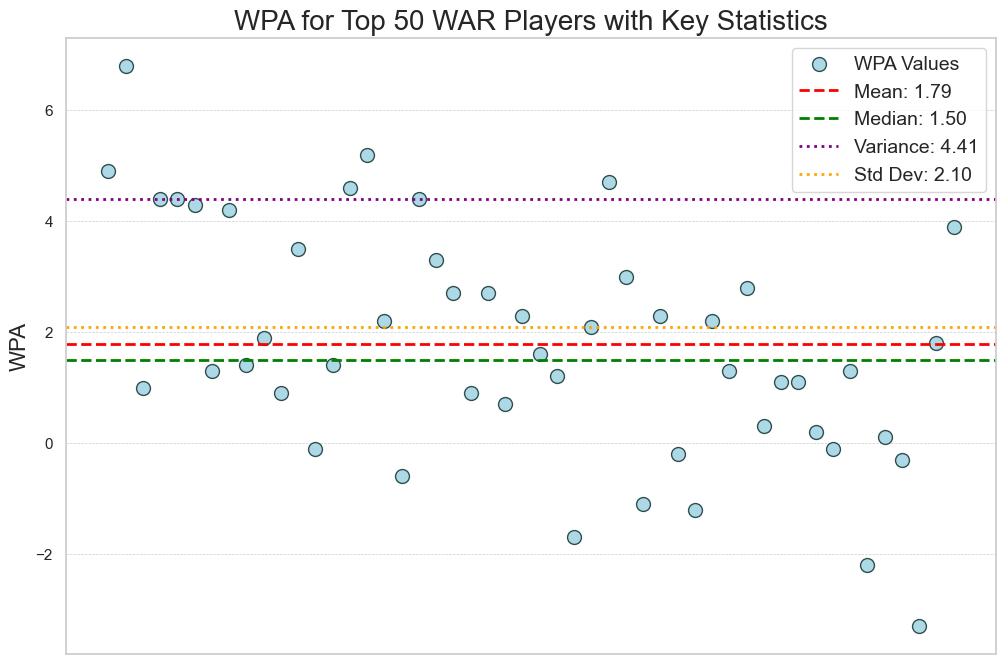

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

def get_top_50_unique_names(data):
    try:
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
        
        combined_data = pd.DataFrame({
            'Player': column_2,
            'WAR': column_16
        })
        
        sorted_data = combined_data.sort_values(by='WAR', ascending=False)
        unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
        top_50 = unique_sorted_data.head(50)
        
        return top_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_wpa_for_top_50_war(top_50_df, filepath):
    try:
        data = pd.read_csv(filepath, encoding='latin1')
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        matching_data = pd.DataFrame({
            'Player': data.iloc[:, 1],  # Column 2 (index 1)
            'WPA': column_9
        }).drop_duplicates(subset='Player')  # Drop duplicates to ensure uniqueness
        
        matching_rows = top_50_df.merge(matching_data, on='Player', how='left')
        
        return matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Define the paths to your CSV files
war_csv_file_path = 'WAR_2023.csv'
wpa_csv_file_path = 'WPA_2023.csv'

# Load the WAR data from the first CSV file
war_data = pd.read_csv(war_csv_file_path, encoding='latin1')

# Get the top 50 unique WAR players
top_50 = get_top_50_unique_names(war_data)

if top_50 is not None:
    # Find the WPA for the top 50 WAR players in the WPA CSV
    matching_rows = find_wpa_for_top_50_war(top_50, wpa_csv_file_path)
    
    if matching_rows is not None and not matching_rows.empty:
        # Calculate statistics for WPA values
        wpa_values = matching_rows['WPA'].dropna()
        wpa_mean = wpa_values.mean()
        wpa_median = wpa_values.median()
        wpa_variance = wpa_values.var()
        wpa_std_dev = wpa_values.std()

        # Plotting the WPA values with Matplotlib
        plt.figure(figsize=(12, 8))
        plt.scatter(range(len(wpa_values)), wpa_values, color='lightblue', edgecolor='DarkSlateGrey', s=100, label='WPA Values')

        # Plot horizontal lines for statistics
        plt.axhline(y=wpa_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {wpa_mean:.2f}')
        plt.axhline(y=wpa_median, color='green', linestyle='--', linewidth=2, label=f'Median: {wpa_median:.2f}')
        plt.axhline(y=wpa_variance, color='purple', linestyle=':', linewidth=2, label=f'Variance: {wpa_variance:.2f}')
        plt.axhline(y=wpa_std_dev, color='orange', linestyle=':', linewidth=2, label=f'Std Dev: {wpa_std_dev:.2f}')

        # Adding titles and labels
        plt.title('WPA for Top 50 WAR Players with Key Statistics', fontsize=20)
        plt.ylabel('WPA', fontsize=16)
        plt.xticks([])  # Remove x-axis labels
        plt.legend(fontsize=14)

        # Adding gridlines
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Display the plot
        plt.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract top 50 names.")


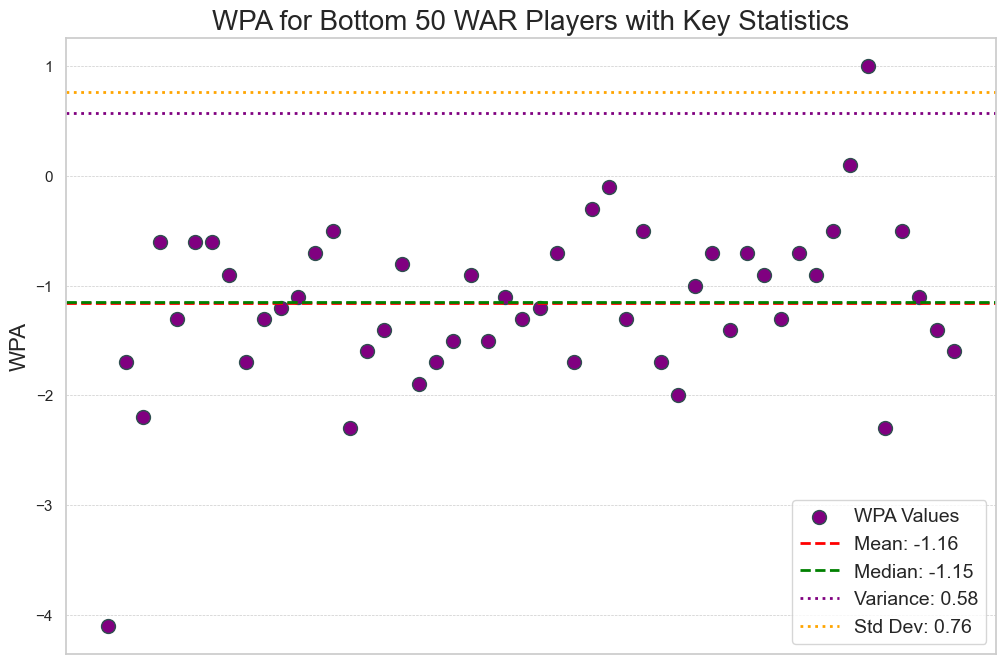

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

def get_bottom_50_unique_names(data):
    try:
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
        
        combined_data = pd.DataFrame({
            'Player': column_2,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in ascending order to get the bottom players
        sorted_data = combined_data.sort_values(by='WAR', ascending=True)
        unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
        bottom_50 = unique_sorted_data.head(50)
        
        return bottom_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_wpa_for_bottom_50_war(bottom_50_df, filepath):
    try:
        data = pd.read_csv(filepath, encoding='latin1')
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        matching_data = pd.DataFrame({
            'Player': data.iloc[:, 1],  # Column 2 (index 1)
            'WPA': column_9
        }).drop_duplicates(subset='Player')  # Drop duplicates to ensure uniqueness
        
        matching_rows = bottom_50_df.merge(matching_data, on='Player', how='left')
        
        return matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Define the paths to your CSV files
war_csv_file_path = 'WAR_2023.csv'
wpa_csv_file_path = 'WPA_2023.csv'

# Load the WAR data from the first CSV file
war_data = pd.read_csv(war_csv_file_path, encoding='latin1')

# Get the bottom 50 unique WAR players
bottom_50 = get_bottom_50_unique_names(war_data)

if bottom_50 is not None:
    # Find the WPA for the bottom 50 WAR players in the WPA CSV
    matching_rows = find_wpa_for_bottom_50_war(bottom_50, wpa_csv_file_path)
    
    if matching_rows is not None and not matching_rows.empty:
        # Calculate statistics for WPA values
        wpa_values = matching_rows['WPA'].dropna()
        wpa_mean = wpa_values.mean()
        wpa_median = wpa_values.median()
        wpa_variance = wpa_values.var()
        wpa_std_dev = wpa_values.std()

        # Plotting the WPA values with Matplotlib
        plt.figure(figsize=(12, 8))
        plt.scatter(range(len(wpa_values)), wpa_values, color='purple', edgecolor='DarkSlateGrey', s=100, label='WPA Values')

        # Plot horizontal lines for statistics
        plt.axhline(y=wpa_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {wpa_mean:.2f}')
        plt.axhline(y=wpa_median, color='green', linestyle='--', linewidth=2, label=f'Median: {wpa_median:.2f}')
        plt.axhline(y=wpa_variance, color='purple', linestyle=':', linewidth=2, label=f'Variance: {wpa_variance:.2f}')
        plt.axhline(y=wpa_std_dev, color='orange', linestyle=':', linewidth=2, label=f'Std Dev: {wpa_std_dev:.2f}')

        # Adding titles and labels
        plt.title('WPA for Bottom 50 WAR Players with Key Statistics', fontsize=20)
        plt.ylabel('WPA', fontsize=16)
        plt.xticks([])  # Remove x-axis labels
        plt.legend(fontsize=14)

        # Adding gridlines
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Display the plot
        plt.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract bottom 50 names.")


# War and WPA #
WAR and WPA Per 162 games standardise these metrics for fair comparisons across a full season:

$$
\left(\frac{\text{WAR}}{\text{Games Played}}\right) \times 162
$$

$$
\left(\frac{\text{WPA}}{\text{Games Played}}\right) \times 162
$$

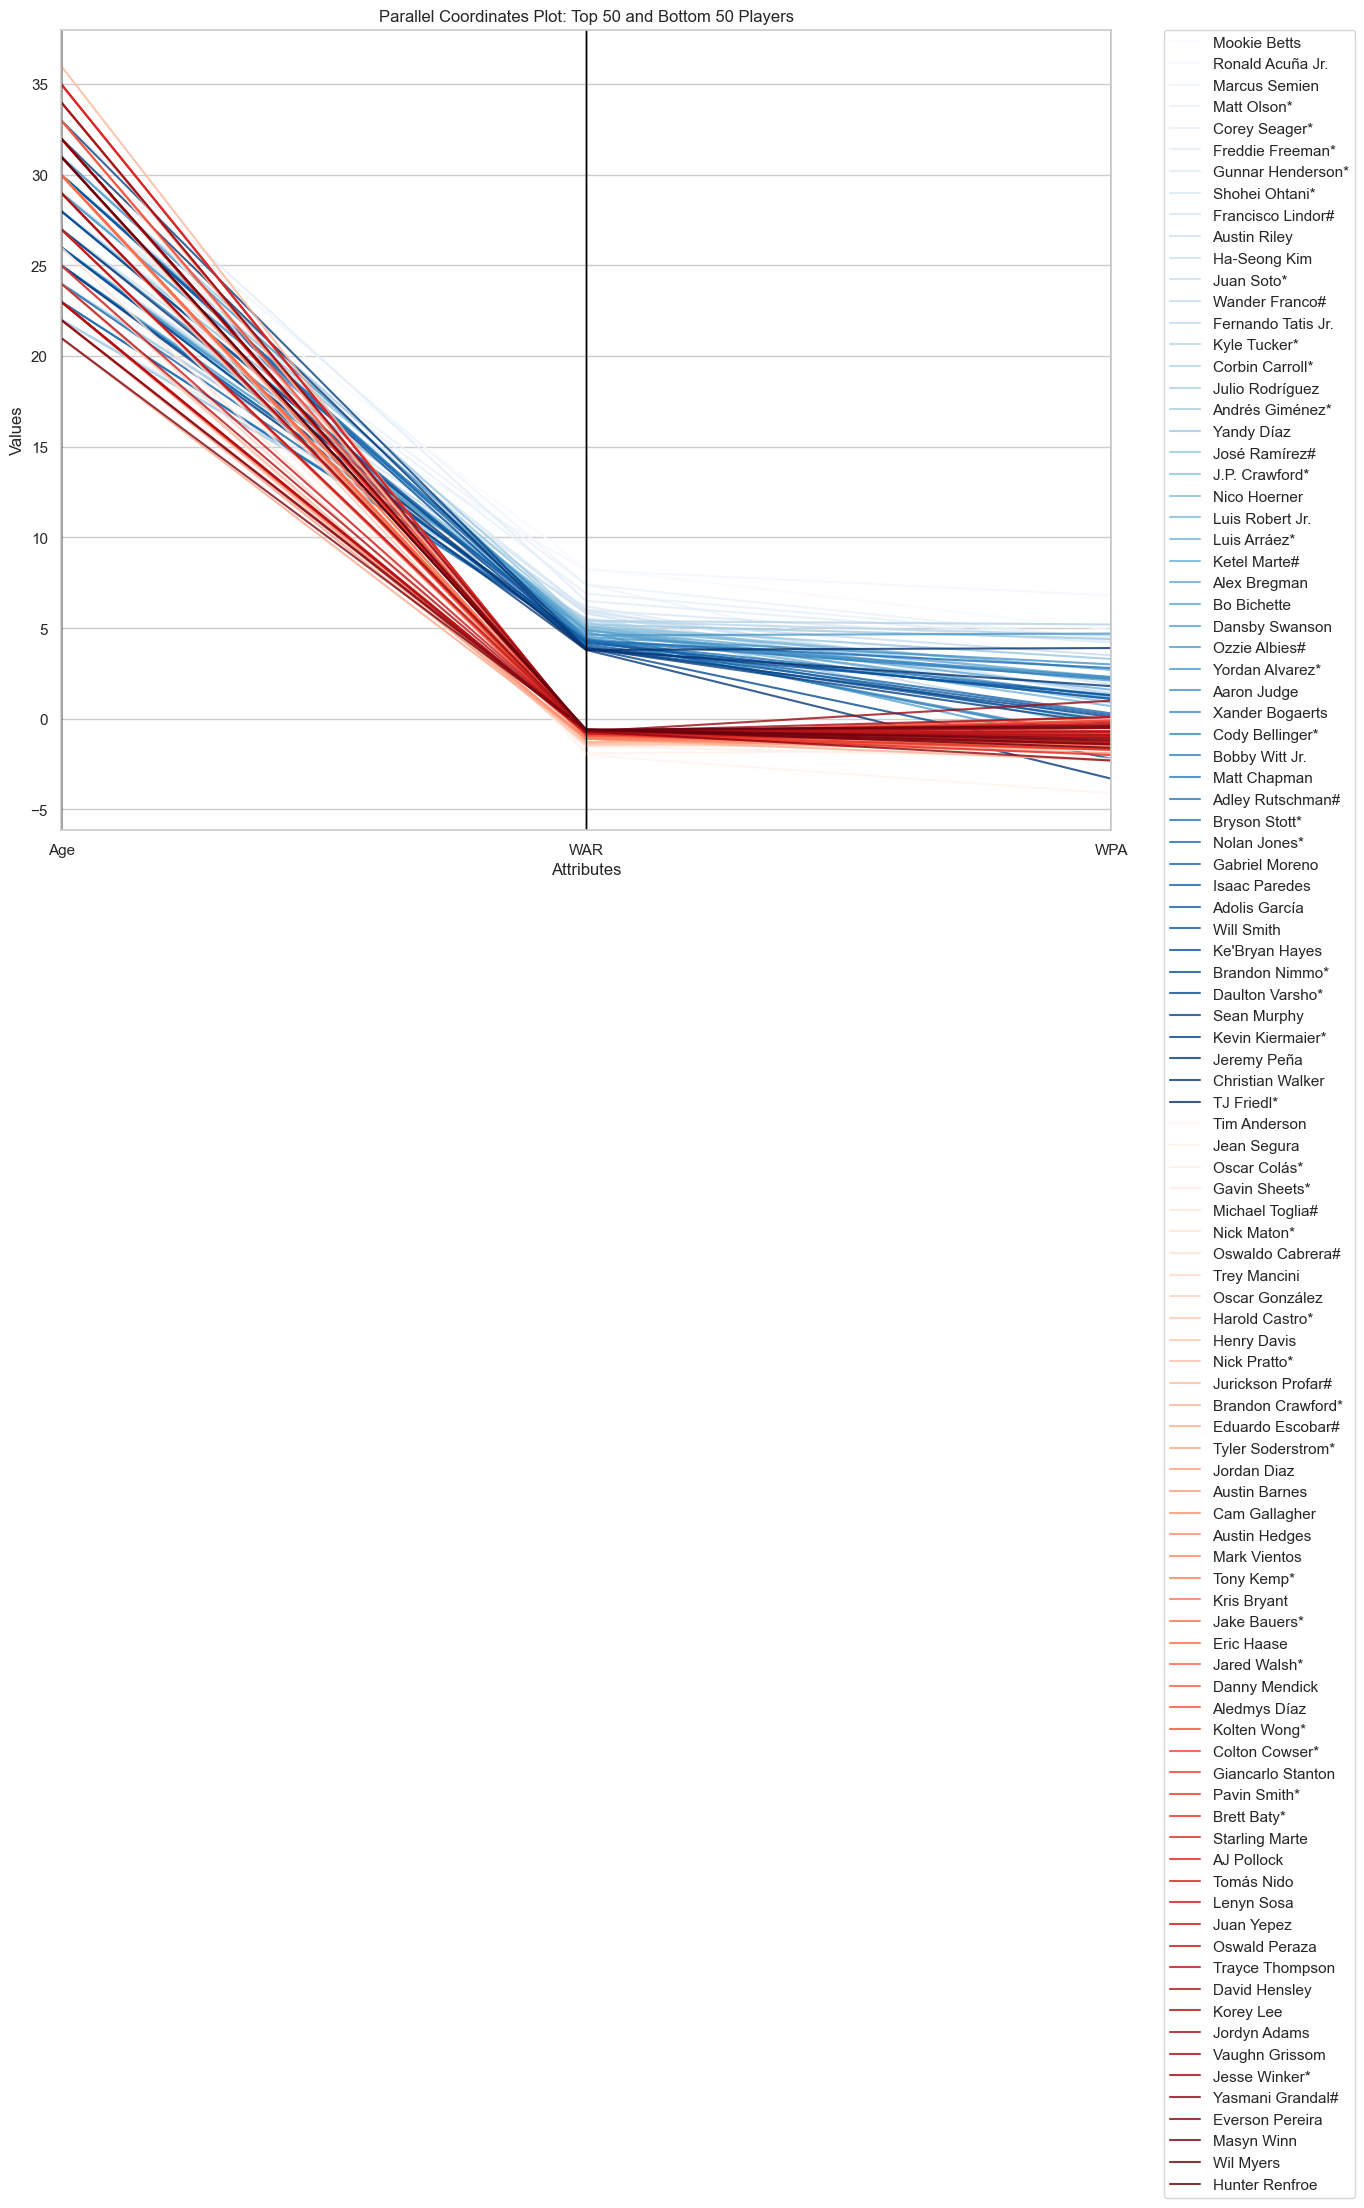

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Your existing functions for loading and processing data...

# Load the first CSV and get the top 50 and bottom 50 WAR players
data = pd.read_csv("WAR_2023.csv", encoding='latin1')
top_50 = get_top_50_names(data)
bottom_50 = get_bottom_50_unique_names(data)

if top_50 is not None and bottom_50 is not None:
    # Find the WPA for the top and bottom 50 WAR players
    second_csv_filepath = "WPA_2023.csv"
    top_50_with_wpa = find_wpa(top_50, second_csv_filepath)
    bottom_50_with_wpa = find_wpa(bottom_50, second_csv_filepath)
    
    if top_50_with_wpa is not None and bottom_50_with_wpa is not None:
        # Combine top and bottom 50 data into one DataFrame
        combined_data = pd.concat([top_50_with_wpa, bottom_50_with_wpa], axis=0).reset_index(drop=True)
        
        # Plotting the parallel coordinates
        plt.figure(figsize=(14, 10))  # Increase the figure size
        
        # Plot top 50 WPA players with one color (e.g., blue)
        parallel_coordinates(top_50_with_wpa, "Player", colormap=plt.get_cmap("Blues"), alpha=0.8)
        
        # Plot bottom 50 WPA players with another color (e.g., red)
        parallel_coordinates(bottom_50_with_wpa, "Player", colormap=plt.get_cmap("Reds"), alpha=0.8)
        
        # Adding title and labels
        plt.title("Parallel Coordinates Plot: Top 50 and Bottom 50 Players")
        plt.xlabel("Attributes")
        plt.ylabel("Values")
        
        # Position the legend outside the plot area
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        
        # Adjust the plot area to make room for the legend and other elements
        plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)
        
        # Show plot
        plt.show()
        
    else:
        print("No matching WPA data found or an error occurred.")
else:
    print("Could not extract top or bottom 50 names.")


# Hypothesis Tests - Results and Discusssion

 To determine whether there is a correlation between WAR and winning percentage and WPA, a pooled variance t-test must be implemented, this is due to the ratio of the variances being less than three, as seen in Figures 2 and 3. This calculation assumes that the population data is not heavily skewed. The calculation of the test statistic (t) is calculated using:

$\bar{X_1} =  51.9$

$\bar{X_2} =  48.9$

$S_1 =  0.423$

$S_2 =  0.168$

$n_1 = 50$

$n_2 = 50$


Using those values, t can be found:

$t = \frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sqrt{s_p^2 \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$


Where:

$s_p^2 = \frac{(n_1 - 1) s_1^2 + (n_2 - 1) s_2^2}{(n_1 - 1) + (n_2 - 1)}$


In [103]:
# Given values
X1_bar = 51.9
X2_bar = 48.9
S1 = 0.423
S2 = 0.168
n1 = 50
n2 = 50

# Calculating s_p^2
s_p2 = ((n1 - 1) * S1**2 + (n2 - 1) * S2**2) / ((n1 - 1) + (n2 - 1))

# Calculating t
mu1_minus_mu2 = 0  # Assuming (μ1 - μ2) = 0 for the null hypothesis
t = (X1_bar - X2_bar - mu1_minus_mu2) / ((s_p2 * (1/n1 + 1/n2)) ** 0.5)

# Output the result
print(f"The calculated t-value is: {t}")


The calculated t-value is: 46.60801889103182


As the test statistic follows a $ n1+n2-2 $ distribution, the degrees of freedom = 

$n_1+n_2-2;   50+50-2$

If we assume that the significance level α = 0.05, the critical value is:




±*t* 46.59 = ±1.984


For this example of WAR and team winning percentage, we reject the null hypothesis \(H_0\) if \(t > 1.984\) or \(t < -1.984\). As \(46.59\) is greater than \(1.984\), we reject the null hypothesis in favour of the alternative hypothesis \(H_A\). The p-value tells us how likely it is for the data obtained to occur under the null hypothesis (Bevans, 2022). To find the p-value, based on Excel's `T.DIST` function will be utilised, using \(t = 46.59\) and degrees of freedom = 98. Therefore, the p-value is extremely small, essentially zero, indicating a significant difference between the means.



Using $\alpha = 0.05$, a confidence interval of 95% must be constructed:

$(51.9 - 48.9) \pm 1.984 \sqrt{s_p^2 \left(\frac{1}{50} + \frac{1}{50}\right)}$

We are therefore 95% confident that the mean value of team winning percentage is between 2.87229 and 3.12771.

The second hypothesis test that will be carried out is between WAR and WPA. It will follow a pooled variance t-test:

$\bar{X}_1 = 1.792$, $\bar{X}_2 = -1.158$, $S_1 = 2.099$, $S_2 = 0.759$, $n_1 = 50$, $n_2 = 50$


Using the above values, t can be found 

In [104]:
# Given values
X1_bar = 1.792
X2_bar = -1.158
S1 = 2.099
S2 = 0.759
n1 = 50
n2 = 50

# Calculating s_p^2
s_p2 = ((n1 - 1) * S1**2 + (n2 - 1) * S2**2) / ((n1 - 1) + (n2 - 1))

# Calculating t
mu1_minus_mu2 = 0  # Assuming (μ1 - μ2) = 0 for the null hypothesis
t = (X1_bar - X2_bar - mu1_minus_mu2) / ((s_p2 * (1/n1 + 1/n2)) ** 0.5)

# Output the result
print(f"The calculated t-value is: {t}")


The calculated t-value is: 9.345666943853194


Assuming $\alpha = 0.05$ and the degrees of freedom = 98, the critical value is:

In [105]:
from scipy.stats import t

# Given values
alpha = 0.05
df = 98

# Calculating the critical t-value for a two-tailed test
critical_value = t.ppf(1 - alpha / 2, df)

print(f"The critical t-value is: {critical_value:.4f}")


The critical t-value is: 1.9845


±*t* 98,0.05 = ± 1.9845

In this example of WAR and WPA, we reject the null hypothesis if $t > 1.984$ or $t < -1.984$. As $9.35$ is greater than $1.984$, we reject the null hypothesis, $H_0$, in favour of the alternative hypothesis of $H_A$. To calculate the p-value, the same T.DIST Excel function is implemented. The p-value $= 1.27 \times 10^{-12}$, which $\approx 0$.


Using $\alpha = 0.05$, a confidence interval of 95% must be constructed:

$(1.792 - (-1.158)) \pm 9.35 \sqrt{\left(\frac{1}{50} + \frac{1}{50}\right)}$


we are 95% confident that the mean scores of WPA will be between 1.08 and 4.82

# Analysis of WAR's Impact on Team Winning Percentage and WPA

After carrying out both hypothesis tests for WAR’s impact on team winning percentage and WAR’s impact on WPA, a few glaring concepts were exposed.

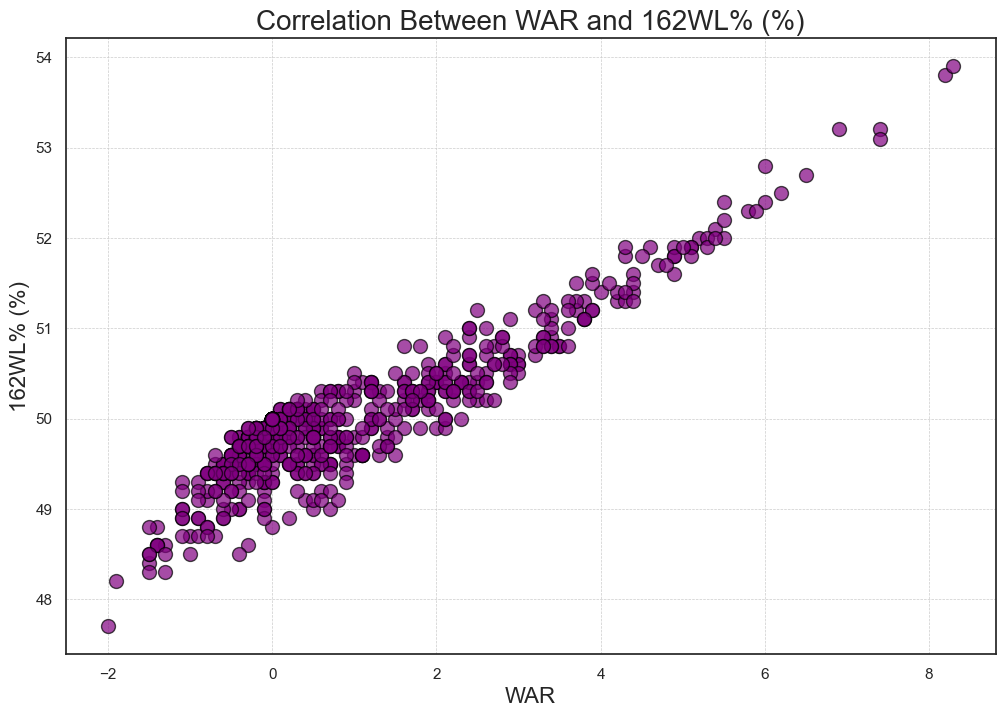

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract columns 16 (WAR) and 18, and convert column 18 to percentages
column_16 = data.iloc[:, 15].rename("WAR")
column_18 = (data.iloc[:, 17] * 100).rename(f"{data.columns[17]} (%)")  # Convert to percentage

# Combine these columns into a DataFrame
combined_data = pd.DataFrame({
    'WAR': column_16,
    f'{data.columns[17]} (%)': column_18
}).dropna()

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(combined_data['WAR'], combined_data[f'{data.columns[17]} (%)'], color='purple', edgecolor='black', s=100, alpha=0.7)

# Add title and labels
plt.title(f'Correlation Between WAR and {data.columns[17]} (%)', fontsize=20)
plt.xlabel('WAR', fontsize=16)
plt.ylabel(f'{data.columns[17]} (%)', fontsize=16)

# Add grid
plt.grid(True, linestyle='--', linewidth=0.5)

# Show plot
plt.show()




## First Hypothesis Test: WAR’s Impact on Team Winning Percentage

In the first hypothesis test, it was found that the test statistic, $t = 46.61$, was located well outside the rejection region of $\pm 1.984$. This automatically results in $H_0$ being rejected in favour of $H_A$. Furthermore, using the test’s p-value, which is effectively zero, further emphasises the fact that the null hypothesis will be rejected, as the p-value is significantly less than the significance level of 0.05. This results in the hypothesis test being statistically significant (Beers, 2023). 

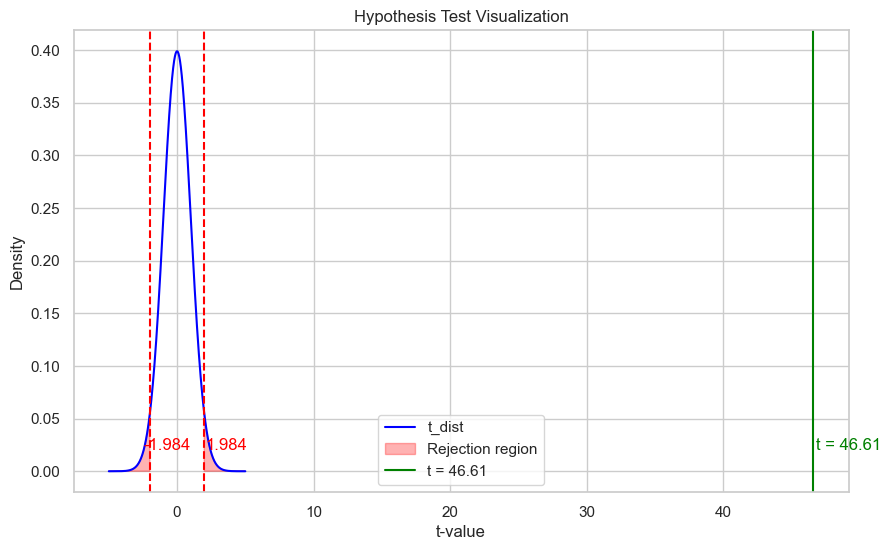

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the parameters
t_statistic = 46.61
critical_value = 1.984
alpha = 0.05

# Create a DataFrame to hold t-distribution values
x = np.linspace(-5, 5, 1000)
t_dist = stats.t.pdf(x, df=1000)  # using a high degree of freedom for approximation
df = pd.DataFrame({'x': x, 't_dist': t_dist})

# Plot the t-distribution using pandas
ax = df.plot(x='x', y='t_dist', legend=False, figsize=(10, 6), color='blue', title="Hypothesis Test Visualization")

# Shade the rejection regions
ax.fill_between(df['x'], 0, df['t_dist'], where=(df['x'] <= -critical_value) | (df['x'] >= critical_value), color='red', alpha=0.3, label='Rejection region')

# Mark the critical values
ax.axvline(-critical_value, color='red', linestyle='--')
ax.axvline(critical_value, color='red', linestyle='--')
ax.text(-critical_value - 0.5, 0.02, '-1.984', color='red', fontsize=12)
ax.text(critical_value + 0.1, 0.02, '1.984', color='red', fontsize=12)

# Mark the test statistic
ax.axvline(t_statistic, color='green', linestyle='-', label=f't = {t_statistic}')
ax.text(t_statistic + 0.2, 0.02, f't = {t_statistic}', color='green', fontsize=12)

# Add labels and legend
ax.set_xlabel("t-value")
ax.set_ylabel("Density")
ax.legend()

# Show the plot
plt.show()


The 95% confidence interval must also be taken into account, with the values of $[2.87, 3.13]$, showing that we are 95% confident that the mean difference in team winning percentage between high and low WAR is within this range. Considering the fact that most team winning percentages hover around 50%, it makes practical sense that this interval is realistic. Thus, we reject the null hypothesis $H_0$:

$$
H_0: \mu_1 = \mu_2 \quad \text{or} \quad \mu_1 - \mu_2 = 0
$$

This indicates that WAR has a statistically significant impact on the winning percentage of a team.

## Second Hypothesis Test: WAR’s Impact on WPA

The second hypothesis test between WAR and WPA proved to be more fruitful as well, as the test statistic, p-value, and confidence interval suggested that $H_0$ would be rejected in favour of $H_A$. The calculated test statistic of $t = 9.35$ was located well outside the rejection region of $\pm 1.984$. This was reinforced with the calculation of the p-value, $1.27 \times 10^{-12}$, which practically equals zero and is not only less than the significance level of 0.05 but also results in the hypothesis test being statistically significant.

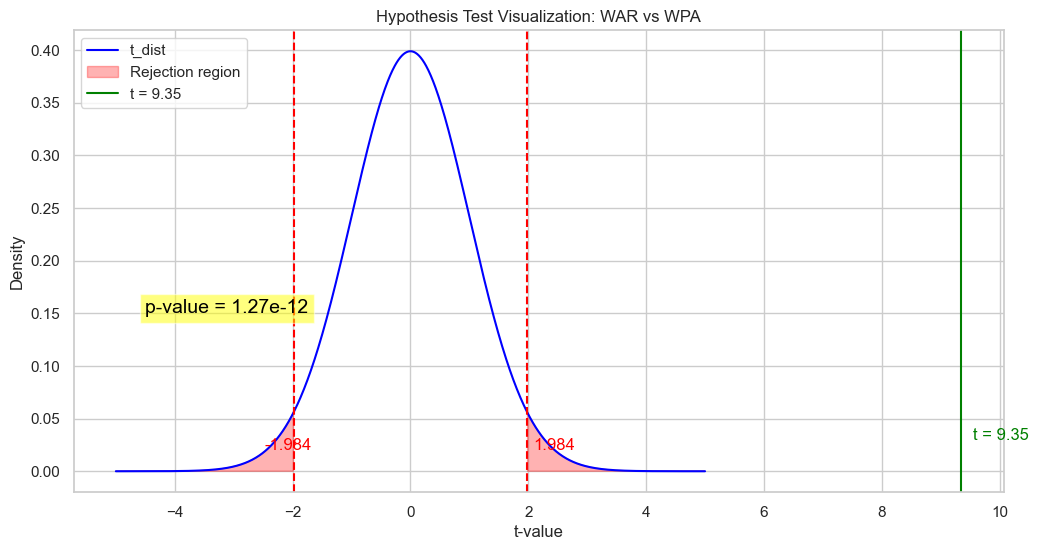

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the parameters for the second hypothesis test
t_statistic = 9.35
critical_value = 1.984
p_value = 1.27e-12

# Create a DataFrame for the t-distribution
x = np.linspace(-5, 5, 1000)
t_dist = stats.t.pdf(x, df=1000)  # using a high degree of freedom for approximation
df = pd.DataFrame({'x': x, 't_dist': t_dist})

# Plot the t-distribution using pandas
ax = df.plot(x='x', y='t_dist', legend=False, figsize=(12, 6), color='blue', title="Hypothesis Test Visualization: WAR vs WPA")

# Shade the rejection regions
ax.fill_between(df['x'], 0, df['t_dist'], where=(df['x'] <= -critical_value) | (df['x'] >= critical_value), color='red', alpha=0.3, label='Rejection region')

# Mark the critical values
ax.axvline(-critical_value, color='red', linestyle='--')
ax.axvline(critical_value, color='red', linestyle='--')
ax.text(-critical_value - 0.5, 0.02, '-1.984', color='red', fontsize=12)
ax.text(critical_value + 0.1, 0.02, '1.984', color='red', fontsize=12)

# Mark the test statistic
ax.axvline(t_statistic, color='green', linestyle='-', label=f't = {t_statistic}')
ax.text(t_statistic + 0.2, 0.03, f't = {t_statistic}', color='green', fontsize=12)

# Annotate the p-value
ax.text(-4.5, 0.15, f'p-value = {p_value:.2e}', fontsize=14, color='black', bbox=dict(facecolor='yellow', alpha=0.5))

# Add labels and legend
ax.set_xlabel("t-value")
ax.set_ylabel("Density")
ax.legend()

# Show the plot
plt.show()


The confidence interval also makes more sense when comparing it to the real-world context. The 95% confidence interval of $[1.08, 4.82]$ suggests that the mean difference in WPA between high and low WAR is within this range. Although the mean of low WAR is excluded from this interval, this is likely a result of extreme outliers, such as a single player in high WAR. A good example of this is Barry Bonds in 2001, 2002, and 2004 in which he single-handedly raised the mean by significant amounts due to his record breaking WAR seasons.

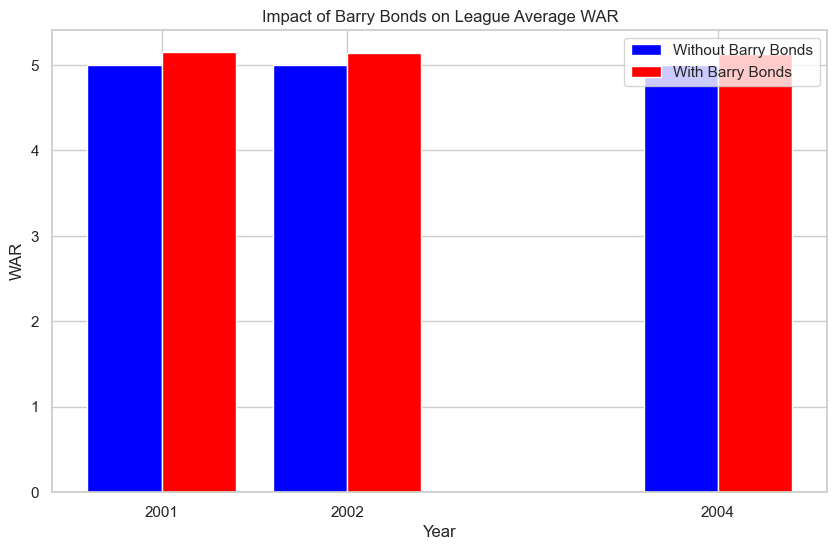

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Barry Bonds' WAR data
bonds_war_data = {'Year': [2001, 2002, 2004],
                  'Bonds WAR': [12.4, 11.8, 11.5]}
bonds_war = pd.DataFrame(bonds_war_data)

# Hypothetical average league WAR data without Bonds (this is a placeholder for actual league data)
league_avg_without_bonds_data = {'Year': [2001, 2002, 2004],
                                 'League Avg WAR without Bonds': [5.0, 5.0, 5.0]}  # Typical average WAR for comparison
league_avg = pd.DataFrame(league_avg_without_bonds_data)

# Calculate the league average WAR including Bonds' WAR
league_avg['League Avg WAR with Bonds'] = (league_avg['League Avg WAR without Bonds'] * 49 + bonds_war['Bonds WAR']) / 50

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(league_avg['Year'] - 0.2, league_avg['League Avg WAR without Bonds'], width=0.4, label='Without Barry Bonds', color='blue')
plt.bar(league_avg['Year'] + 0.2, league_avg['League Avg WAR with Bonds'], width=0.4, label='With Barry Bonds', color='red')

# Customizing the plot
plt.xlabel('Year')
plt.ylabel('WAR')
plt.title('Impact of Barry Bonds on League Average WAR')
plt.xticks(league_avg['Year'])
plt.legend()
plt.show()


 Altogether, the test statistic, p-value, and confidence interval result in the null hypothesis $H_0$ being rejected in favour of $H_A$:

$$
H_A: \mu_1 \neq \mu_2 \quad \text{or} \quad \mu_1 - \mu_2 \neq 0
$$

Therefore, there is a correlation between higher WAR and higher WPA, meaning that players who can accumulate high WAR give their team every possible chance to win.

## Broader Report Conclusion

Connecting these results to the broader report question, it has been found that despite high WAR players performing at all-time levels, that does not necessarily correlate with a significantly higher team winning percentage. This is the same for low WAR players. This is likely due to the fact that good and bad players can play for good or bad teams. For example, most of the players seen in the high and low WAR datasets were drafted by the teams where they had their historically good or bad seasons. When a team drafts a player, they have at least six years of that player’s MLB career (assuming they don’t trade or cut the player) (MLB Standard States, n.d.), meaning if a historically good player is drafted by a historically bad team, it truly doesn’t matter how well that player performs if his positional and pitching teammates are unable to perform as well.

Furthermore, the types of players in low WAR can also explain the lack of correlation between team winning percentage and WAR. When analysing what kind of players were on the list, two major patterns occurred. The most common types of players were ageing superstars and young players with perceived potential. For example, Giancarlo Stanton, Kris Bryant and Henry Davis appeared on the low WAR list. Stanton aged 33 and Bryant aged 31 in the 2023 season, had MVP seasons of the mid 2010s. 

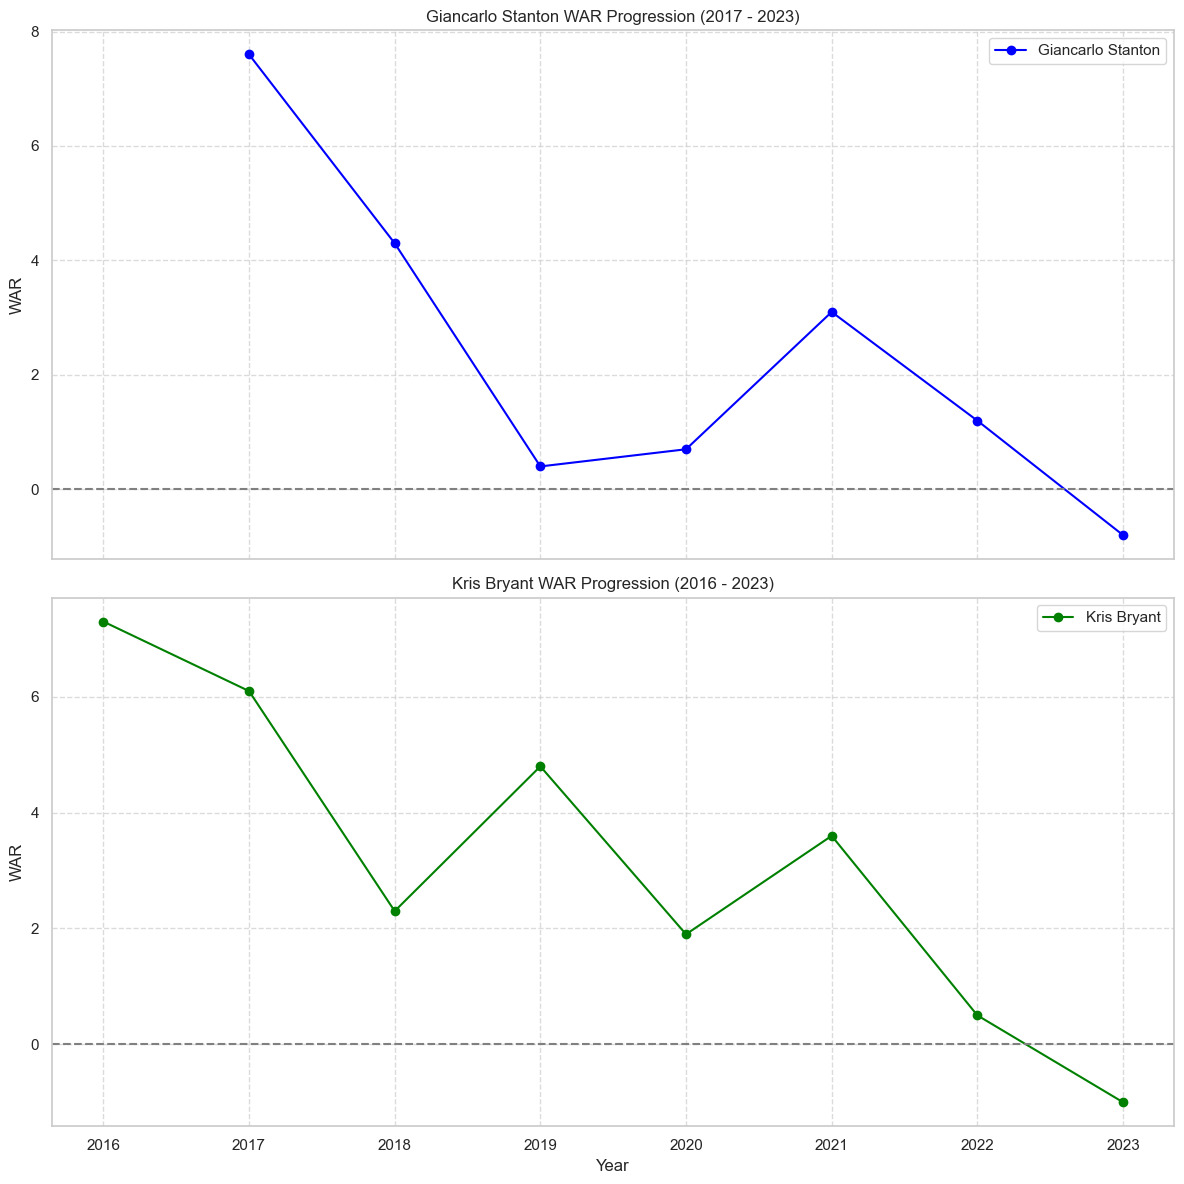

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Giancarlo Stanton WAR Data (MVP in 2017)
stanton_war_data = {
    "Year": [2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "WAR": [7.6, 4.3, 0.4, 0.7, 3.1, 1.2, -0.8]
}

# Kris Bryant WAR Data (MVP in 2016)
bryant_war_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "WAR": [7.3, 6.1, 2.3, 4.8, 1.9, 3.6, 0.5, -1.0]
}

# Creating DataFrames
stanton_df = pd.DataFrame(stanton_war_data)
bryant_df = pd.DataFrame(bryant_war_data)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Stanton graph
axs[0].plot(stanton_df["Year"], stanton_df["WAR"], marker='o', linestyle='-', color='blue', label='Giancarlo Stanton')
axs[0].set_title('Giancarlo Stanton WAR Progression (2017 - 2023)')
axs[0].set_ylabel('WAR')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].axhline(0, color='gray', linestyle='--')

# Bryant graph
axs[1].plot(bryant_df["Year"], bryant_df["WAR"], marker='o', linestyle='-', color='green', label='Kris Bryant')
axs[1].set_title('Kris Bryant WAR Progression (2016 - 2023)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('WAR')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].axhline(0, color='gray', linestyle='--')

# Adjust layout
plt.tight_layout()

plt.show()



 Davis, on the other hand, was a first-overall pick in the 2021 draft, making his rookie Debute in 2023 and was continuously played, despite his poor performances, due to his ‘potential’. Both player groups accumulated negative WAR, however, the way in which they achieved it was vastly different, with their season expectations also contrasting.
